Import the necessary libraries like pandas, numpy, scikit-learn, and torch

In [1]:
import os
import requests
import tarfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.combine import SMOTEENN

## 1. Download the Dataset:
This module downloads the dataset from the Carnegie Mellon University site. Use libraries like wget or requests to achieve this.

In [2]:
"""import requests
import tarfile

#Only  uncomment when first runing this notebook.
url = "https://kilthub.cmu.edu/ndownloader/files/24856766"
response = requests.get(url)
with open("r4.2.tar.bz2", "wb") as file:
    file.write(response.content)


with tarfile.open('r4.2.tar.bz2', 'r:bz2') as tar:
    tar.extractall()
"""

'import requests\nimport tarfile\n\n#Only  uncomment when first runing this notebook.\nurl = "https://kilthub.cmu.edu/ndownloader/files/24856766"\nresponse = requests.get(url)\nwith open("r4.2.tar.bz2", "wb") as file:\n    file.write(response.content)\n\n\nwith tarfile.open(\'r4.2.tar.bz2\', \'r:bz2\') as tar:\n    tar.extractall()\n'

In [3]:
"""#Only  uncomment when first runing this notebook.
#download answers
url = "https://kilthub.cmu.edu/ndownloader/files/24857828"
response = requests.get(url)
with open("answers.tar.bz2", "wb") as file:
    file.write(response.content)


with tarfile.open('answers.tar.bz2', 'r:bz2') as tar:
    tar.extractall()"""

'#Only  uncomment when first runing this notebook.\n#download answers\nurl = "https://kilthub.cmu.edu/ndownloader/files/24857828"\nresponse = requests.get(url)\nwith open("answers.tar.bz2", "wb") as file:\n    file.write(response.content)\n\n\nwith tarfile.open(\'answers.tar.bz2\', \'r:bz2\') as tar:\n    tar.extractall()'

## 2.Data preprocessing:

In [4]:
def clean_df(df):
    ### Remove missing values
    #df = df.dropna() #Retain Missing values(Only email's cc and bcc have missing values will be only used in feature engineering)

    ### Remove duplicate values
    df = df.drop_duplicates()

    ### Standardize date format
    df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y %H:%M:%S")

    ### Remove curly Brackets in ids
    df["id"] = df["id"].apply(lambda x: x.replace("{", "").replace("}", ""))
    return df

"""# Email
email = pd.read_csv("r4.2/email.csv") # Assigning a variable to the email CSV file
display(email.head())
display(email.info())
## Data cleaning
email_cl = clean_df(email)

display(email_cl.head())
display(email_cl.info())"""

'# Email\nemail = pd.read_csv("r4.2/email.csv") # Assigning a variable to the email CSV file\ndisplay(email.head())\ndisplay(email.info())\n## Data cleaning\nemail_cl = clean_df(email)\n\ndisplay(email_cl.head())\ndisplay(email_cl.info())'

In [5]:
"""# Device
device = pd.read_csv("r4.2/device.csv") # Assigning a variable to the device CSV file

display(device.head())
display(device.info())

## Data cleaning
device_cl = clean_df(device)

display(device_cl.head())
display(device_cl.info())"""

'# Device\ndevice = pd.read_csv("r4.2/device.csv") # Assigning a variable to the device CSV file\n\ndisplay(device.head())\ndisplay(device.info())\n\n## Data cleaning\ndevice_cl = clean_df(device)\n\ndisplay(device_cl.head())\ndisplay(device_cl.info())'

In [6]:
"""# File
file_df = pd.read_csv("r4.2/file.csv") # Assigning a variable to the file CSV file

display(file_df.head())
display(file_df.info())

## Data cleaning
file_df_cl = clean_df(file_df)

display(file_df_cl.head())
display(file_df_cl.info())"""

'# File\nfile_df = pd.read_csv("r4.2/file.csv") # Assigning a variable to the file CSV file\n\ndisplay(file_df.head())\ndisplay(file_df.info())\n\n## Data cleaning\nfile_df_cl = clean_df(file_df)\n\ndisplay(file_df_cl.head())\ndisplay(file_df_cl.info())'

In [7]:
"""import os
# LDAP
# LDAP consists of a number of csv files updated every month
ldap = {} # create an empty dictionary that will hold all our ldap datasets
ldap_files = os.listdir('r4.2/LDAP')

for fn in ldap_files:
    ldap_key = fn.split('.')[0]
    ldap[ldap_key] = pd.read_csv(os.path.join('r4.2/LDAP',fn))

display(ldap['2010-11'].head())
print("LDAP keys =>", ldap.keys())"""

'import os\n# LDAP\n# LDAP consists of a number of csv files updated every month\nldap = {} # create an empty dictionary that will hold all our ldap datasets\nldap_files = os.listdir(\'r4.2/LDAP\')\n\nfor fn in ldap_files:\n    ldap_key = fn.split(\'.\')[0]\n    ldap[ldap_key] = pd.read_csv(os.path.join(\'r4.2/LDAP\',fn))\n\ndisplay(ldap[\'2010-11\'].head())\nprint("LDAP keys =>", ldap.keys())'

In [8]:
"""total_ldap=0
for k,v in ldap.items():
    total_ldap += len(v)
print('Total ldap items are: ', total_ldap)"""

"total_ldap=0\nfor k,v in ldap.items():\n    total_ldap += len(v)\nprint('Total ldap items are: ', total_ldap)"

In [9]:
"""# Device
logon = pd.read_csv("r4.2/logon.csv") # Assigning a variable to the file CSV file

display(logon.head())
display(logon.info())

## Data cleaning
logon_cl = clean_df(logon)

display(logon_cl.head())
display(logon_cl.info())"""

'# Device\nlogon = pd.read_csv("r4.2/logon.csv") # Assigning a variable to the file CSV file\n\ndisplay(logon.head())\ndisplay(logon.info())\n\n## Data cleaning\nlogon_cl = clean_df(logon)\n\ndisplay(logon_cl.head())\ndisplay(logon_cl.info())'

In [10]:
import os

### Sample data for easier analysis
email_cl = clean_df(pd.read_csv('email.csv'))
logon_cl = clean_df(pd.read_csv('logon.csv'))
file_df_cl = clean_df(pd.read_csv('file_df.csv'))
device_cl = clean_df(pd.read_csv('device.csv'))

# LDAP
ldap = {} # create an empty dictionary that will hold all our ldap datasets
ldap_files = os.listdir('LDAP')

for fn in ldap_files:
    ldap_key = fn.split('.')[0]
    ldap[ldap_key] = pd.read_csv(os.path.join('LDAP',fn))

In [11]:
# Answers
def extract_uid(text):
    return text.split('-')[-1].split('.')[0]

#Create list of user, data dir tuples for the 3 scenarios
sn1 = [(f'answers/r4.2-1/{dir_}', extract_uid(dir_)) for dir_ in os.listdir('answers/r4.2-1')]
sn2 = [(f'answers/r4.2-2/{dir_}', extract_uid(dir_) )for dir_ in os.listdir('answers/r4.2-2')]
sn3 = [(f'answers/r4.2-3/{dir_}', extract_uid(dir_)) for dir_ in os.listdir('answers/r4.2-3')]

# Create a dictionary of used files with respective columns
data_file_cols={
        'email': email_cl.columns.tolist(),
        'logon': logon_cl.columns.tolist(),
        'file': file_df_cl.columns.tolist(),
        'device': device_cl.columns.tolist(),
               }

# Function to create user and clean red alert scenarios data.
def create_labels(sn_dirs):
    #Create an empty dictionary of the answers data
    answers={}

    #iterate the scenario's dirs to populate the answers dict.
    for sn in sn_dirs:
        files_data={}
        # read the data
        data = pd.read_csv(sn[0], names=list(range(20)))
        # set the column 0 as index
        data = data.set_index([0])
        files = set(data.index.tolist()) # get the unique indexes(file impacted)

        #iterate the unique files to populate the files data dictionary
        for file in files:
            if file in data_file_cols.keys():
                file_cols = data_file_cols[file]
                file_data = data.loc[file]

                # If file's data is a series(a single entry) convert it to a dataframe
                if type(file_data)==pd.core.series.Series:
                    file_data = pd.DataFrame(data.loc[file][:len(file_cols)].to_dict(), index=[0])

                # Else fetch file data then reset index and drop column 0 to have matching data
                else:
                    file_data = data.loc[file].iloc[:,:len(file_cols)].reset_index().drop([0],axis=1)

                # set the columns similar to that of the actual data.
                file_data.columns = file_cols

                #clean the data
                files_data[file] = clean_df(file_data)

        answers[sn[1]] = files_data

    return answers


# Populate the answer dict with user and respective scenario data
ans_sn1=create_labels(sn1)
ans_sn2=create_labels(sn2)
ans_sn3=create_labels(sn3)

In [12]:
def label_creator(data_name, sn, data):
    uids = sn.keys()
    for uid in uids:
        anom_data = sn.get(uid, None).get(data_name, None)
        if anom_data is not None:
            anom_data=anom_data.set_index('date')
            try:
                data.loc[anom_data.index, 'target'] = 'threat'
            except KeyError :
                data = pd.concat([data, anom_data])
                data.loc[anom_data.index, 'target'] = 'threat'

    return data.reset_index()


## Feature Engineering

### a. Email

In [13]:
#adding target column

email_cl['target']= ["normal" for i in range(len(email_cl['id']))]

email_cl=label_creator('email',ans_sn1, email_cl.set_index('date'))
email_cl=label_creator('email',ans_sn2, email_cl.set_index('date'))
email_cl=label_creator('email',ans_sn3, email_cl.set_index('date'))

In [14]:
# Create a list of all recipients
def list_recipients(row):
    recipients = []
    for emails in row:
        if not np.nan_to_num(emails):
            continue
        recipients+=emails.split(';')
    return recipients

email_cl['recipients'] =  email_cl[['to','cc','bcc']].apply(list_recipients, axis=1)

In [15]:
from datetime import datetime

def check_use_dtaa_mail(email):
    domain = email.split('@')[1]
    if domain != 'dtaa.com':
        return 'non_dtaa'
    return 'dtaa'

ldap_roles_dict = {k: v.set_index('user_id')['role'].to_dict() for k,v in ldap.items()} 

def check_user_role(row):
    date = row['date'].strftime("%Y-%m")
    user_id = row['user']
    role = ldap_roles_dict.get(date).get(user_id)
    if role:
        return role
    return 'unknown'

email_cl['timestamp']=email_cl['date'].apply(lambda x: datetime.timestamp(x))
email_cl['role'] = email_cl[['user','date']].apply(check_user_role, axis=1)
email_cl['dtaa_mail'] = email_cl['from'].apply(check_use_dtaa_mail)
email_cl['num_mails'] = email_cl['user'].apply(lambda x: 1)

email_cl.head()

,date,id,user,pc,to,cc,bcc,from,size,attachments,content,target,recipients,timestamp,role,dtaa_mail,num_mails
0,2010-01-02 07:11:45,R3I7-S4TX96FG-8219JWFF,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830.0,0.0,middle f2 systems 4 july techniques powerful d...,normal,"[Dean.Flynn.Hines@dtaa.com, Wade_Harrison@lock...",1.262406e+09,Technician,dtaa,1
1,2010-01-02 07:12:16,R0R9-E4GL59IK-2907OSWJ,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942.0,0.0,the breaking called allied reservations former...,normal,[Odonnell-Gage@bellsouth.net],1.262406e+09,HardwareEngineer,non_dtaa,1
2,2010-01-02 07:13:00,G2B2-A8XY58CP-2847ZJZL,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780.0,0.0,slowly this uncinus winter beneath addition ex...,normal,[Penelope_Colon@netzero.com],1.262406e+09,Technician,non_dtaa,1
3,2010-01-02 07:13:17,A3A9-F4TH89AA-8318GFGK,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907.0,0.0,400 other difficult land cirrocumulus powered ...,normal,[Judith_Hayden@comcast.net],1.262406e+09,Technician,non_dtaa,1
4,2010-01-02 07:13:28,E8B7-C8FZ88UF-2946RUQQ,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319.0,0.0,this kmh october holliswood number advised unu...,normal,"[Bond-Raymond@verizon.net, Alea_Ferrell@msn.co...",1.262406e+09,HardwareEngineer,non_dtaa,1


In [16]:
# Copy the cleaned data
email_cp = email_cl.copy()
email_cp=email_cp.drop(['to','cc','bcc'], axis=1)

#set date as index
email_cp.set_index('date', inplace=True)
email_cp.head()

,id,user,pc,from,size,attachments,content,target,recipients,timestamp,role,dtaa_mail,num_mails
date,,,,,,,,,,,,,
2010-01-02 07:11:45,R3I7-S4TX96FG-8219JWFF,LAP0338,PC-5758,Lynn.Adena.Pratt@dtaa.com,25830.0,0.0,middle f2 systems 4 july techniques powerful d...,normal,"[Dean.Flynn.Hines@dtaa.com, Wade_Harrison@lock...",1.262406e+09,Technician,dtaa,1
2010-01-02 07:12:16,R0R9-E4GL59IK-2907OSWJ,MOH0273,PC-6699,MOH68@optonline.net,29942.0,0.0,the breaking called allied reservations former...,normal,[Odonnell-Gage@bellsouth.net],1.262406e+09,HardwareEngineer,non_dtaa,1
2010-01-02 07:13:00,G2B2-A8XY58CP-2847ZJZL,LAP0338,PC-5758,Lynn_A_Pratt@earthlink.net,28780.0,0.0,slowly this uncinus winter beneath addition ex...,normal,[Penelope_Colon@netzero.com],1.262406e+09,Technician,non_dtaa,1
2010-01-02 07:13:17,A3A9-F4TH89AA-8318GFGK,LAP0338,PC-5758,Lynn_A_Pratt@earthlink.net,21907.0,0.0,400 other difficult land cirrocumulus powered ...,normal,[Judith_Hayden@comcast.net],1.262406e+09,Technician,non_dtaa,1
2010-01-02 07:13:28,E8B7-C8FZ88UF-2946RUQQ,MOH0273,PC-6699,MOH68@optonline.net,17319.0,0.0,this kmh october holliswood number advised unu...,normal,"[Bond-Raymond@verizon.net, Alea_Ferrell@msn.co...",1.262406e+09,HardwareEngineer,non_dtaa,1


In [17]:
# a.) Try to set a threshold for the number of mails sent by a user

# Group by daily date, user id and role
email_cp_daily=email_cp.groupby([ pd.Grouper(freq='D'),'user','role'])
# Get number of mails sent that day
email_cp_daily_num_mails = email_cp_daily['num_mails'].sum()

# Create a guide dict to provide the average mails sent by a role per user
def ldap_emails_per_role(date, daily_num_emails_df) -> dict:
    #roles = np.unique(ldap[date]['role'].values) #actual
    roles = np.unique(email_cp['role'].values)
    emails_thresh_dict={role: round(daily_num_emails_df.loc[(slice(None) , slice(None), role)].mean()) for role in roles}
    return emails_thresh_dict

In [18]:
email_cp1 = email_cp.reset_index()
email_cp1["day"] = email_cp1["date"].apply(lambda x : x.date()) # Extract the date part from the datetime column
email_count = email_cp1.groupby(["role","user", "day"])["id"].count().reset_index() # Group by user and day and count the number of emails
email_count.rename(columns={"id": "count"}, inplace=True)
email_count.head()

,role,user,day,count
0,AdministrativeAssistant,AJD0074,2010-01-04,7
1,AdministrativeAssistant,AKR0057,2010-10-07,1
2,AdministrativeAssistant,AKR0057,2010-10-12,2
3,AdministrativeAssistant,AKR0057,2010-10-15,2
4,AdministrativeAssistant,AKR0057,2010-10-18,2


In [19]:
# calc user daily mails
email_cp_daily_us=email_cp.groupby([ pd.Grouper(freq='D'),'user'])

mails_sent_thresh = ldap_emails_per_role('2010-01', email_cp_daily_num_mails)
# Check if user exceed average mails sent in the role.
def check_mails_sent(row):
    #date = row['date'].strftime('%Y-%m')
    #mails_thresh = ldap_emails_per_role('2010-01', email_cp_daily_num_mails)
    role=row['role'][0]

    mails = row['num_mails'].sum()
    if mails > mails_sent_thresh[role]:
        return 'exceeds'
    return 'normal'

user_daily_mails=pd.DataFrame(email_cp_daily_us.apply(check_mails_sent), columns=['mails_sent_thresh'])
user_daily_mails

mails_sent_thresh
date       user                     
2010-01-02 ABC0174           exceeds
           AHC0142           exceeds
           AJR0319           exceeds
           ALB0892           exceeds
           AMW0392           exceeds
...                              ...
2011-03-28 HBO0413            normal
2011-04-05 CQW0652            normal
2011-04-28 FBA0348            normal
           JLM0364           exceeds
2011-04-29 FBA0348            normal

[452 rows x 1 columns]

In [20]:
## CAUTION! Too ram intensive

In [21]:
"""import nltk
nltk.download('popular')"""

"import nltk\nnltk.download('popular')"

In [22]:
"""#b.) Role based Content Analysis
# Remove punctuation, numbers, stopwords, and other irrelevant characters from the text data
import string
import re
import spacy
from nltk.corpus import stopwords
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer

# Create a spaCy tokenizer
nlp = spacy.load("en_core_web_sm")
spacy_tokenizer = Tokenizer(nlp.vocab)
#print(spacy_tokenizer)

# Define a function to remove punctuation, numbers, and stopwords from a text
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    # Tokenize the text
    tokens = spacy_tokenizer(text)
    # Lowercase the tokens
    tokens = [token.lower_ for token in tokens]
    # Remove stopwords
    stop_words = stopwords.words("english")
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Apply the function to the email content column
email_cl["clean_text"] = email_cl["content"].apply(preprocess_text)"""

'#b.) Role based Content Analysis\n# Remove punctuation, numbers, stopwords, and other irrelevant characters from the text data\nimport string\nimport re\nimport spacy\nfrom nltk.corpus import stopwords\nfrom spacy.lang.en import English\nfrom spacy.tokenizer import Tokenizer\n\n# Create a spaCy tokenizer\nnlp = spacy.load("en_core_web_sm")\nspacy_tokenizer = Tokenizer(nlp.vocab)\n#print(spacy_tokenizer)\n\n# Define a function to remove punctuation, numbers, and stopwords from a text\ndef preprocess_text(text):\n    # Remove punctuation and numbers\n    text = re.sub(r"[^\\w\\s]", "", text)\n    text = re.sub(r"\\d+", "", text)\n    # Tokenize the text\n    tokens = spacy_tokenizer(text)\n    # Lowercase the tokens\n    tokens = [token.lower_ for token in tokens]\n    # Remove stopwords\n    stop_words = stopwords.words("english")\n    tokens = [token for token in tokens if token not in stop_words]\n    return tokens\n\n# Apply the function to the email content column\nemail_cl["clean_

In [23]:
"""# Stem or lemmatize the text data to reduce words to their base forms
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

# Create a Porter stemmer and a WordNet lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to stem or lemmatize a list of tokens
def stem_or_lemmatize(tokens, method="stem"):
    # Choose the method based on the argument
    if method == "stem":
        # Stem the tokens using Porter stemmer
        tokens = [stemmer.stem(token) for token in tokens]
    elif method == "lemmatize":
        # Lemmatize the tokens using WordNet lemmatizer and verb as the part of speech
        tokens = [lemmatizer.lemmatize(token, pos=wordnet.VERB) for token in tokens]
    else:
        # Raise an error if the method is not valid
        raise ValueError("Invalid method. Choose either 'stem' or 'lemmatize'.")
    return tokens

# Apply the function to the clean text column with lemmatization as the method
email_cl["clean_text"] = email_cl["clean_text"].apply(lambda x: stem_or_lemmatize(x, method="lemmatize"))"""

'# Stem or lemmatize the text data to reduce words to their base forms\nfrom nltk.stem import PorterStemmer, WordNetLemmatizer\nfrom nltk.corpus import wordnet\n\n# Create a Porter stemmer and a WordNet lemmatizer\nstemmer = PorterStemmer()\nlemmatizer = WordNetLemmatizer()\n\n# Define a function to stem or lemmatize a list of tokens\ndef stem_or_lemmatize(tokens, method="stem"):\n    # Choose the method based on the argument\n    if method == "stem":\n        # Stem the tokens using Porter stemmer\n        tokens = [stemmer.stem(token) for token in tokens]\n    elif method == "lemmatize":\n        # Lemmatize the tokens using WordNet lemmatizer and verb as the part of speech\n        tokens = [lemmatizer.lemmatize(token, pos=wordnet.VERB) for token in tokens]\n    else:\n        # Raise an error if the method is not valid\n        raise ValueError("Invalid method. Choose either \'stem\' or \'lemmatize\'.")\n    return tokens\n\n# Apply the function to the clean text column with lemmat

In [24]:
"""# Vectorize the text data into numerical representations, such as bag-of-words or TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create a bag-of-words vectorizer and a TF-IDF vectorizer
role_bow_vectorizer = {}
role_tfidf_vectorizer = {}

# Define a function to vectorize a list of tokens into a sparse matrix
def vectorize_text(tokens, method="bow"):
    #print(tokens.name)
    # Join the tokens into a single string
    texts = [" ".join(token) for token in tokens]
    # Choose the method based on the argument
    if method == "bow":
        # Vectorize the text using bag-of-words vectorizer
        bow_vectorizer = CountVectorizer(min_df=0.02)
        vector = bow_vectorizer.fit_transform(texts)
        role_bow_vectorizer[tokens.name] = bow_vectorizer
    elif method == "tfidf":
        # Vectorize the text using TF-IDF vectorizer
        tfidf_vectorizer = TfidfVectorizer(min_df=0.02)
        vector = tfidf_vectorizer.fit_transform(texts)
        role_tfidf_vectorizer[tokens.name] = tfidf_vectorizer
        #print(vectorizer.get_feature_names_out())
    else:
        # Raise an error if the method is not valid
        raise ValueError("Invalid method. Choose either 'bow' or 'tfidf'.")

    return vector

# Apply the function to the clean text column with TF-IDF as the method
email_cl_role = email_cl.groupby('role')

email_cl_role_tfidfs = email_cl_role["clean_text"].apply(lambda x: vectorize_text(x, method="tfidf"))"""

'# Vectorize the text data into numerical representations, such as bag-of-words or TF-IDF\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\n\n# Create a bag-of-words vectorizer and a TF-IDF vectorizer\nrole_bow_vectorizer = {}\nrole_tfidf_vectorizer = {}\n\n# Define a function to vectorize a list of tokens into a sparse matrix\ndef vectorize_text(tokens, method="bow"):\n    #print(tokens.name)\n    # Join the tokens into a single string\n    texts = [" ".join(token) for token in tokens]\n    # Choose the method based on the argument\n    if method == "bow":\n        # Vectorize the text using bag-of-words vectorizer\n        bow_vectorizer = CountVectorizer(min_df=0.02)\n        vector = bow_vectorizer.fit_transform(texts)\n        role_bow_vectorizer[tokens.name] = bow_vectorizer\n    elif method == "tfidf":\n        # Vectorize the text using TF-IDF vectorizer\n        tfidf_vectorizer = TfidfVectorizer(min_df=0.02)\n        vector = tfidf_vectorizer.fit_

In [25]:
"""from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD

# Initialize a list to store topic models for each role
roles = np.unique(email_cl['role'].tolist())

role_topic_lda_models = {role: None for role in roles}
role_topic_nmf_models = {}
role_topic_lsa_models = {}

# Iterate through each role group
for role in role_topic_lda_models:
    # Vectorize the content (you can choose TF-IDF or Count Vectorizer)
    tfidf = email_cl_role_tfidfs[role]

    # Perform topic modeling (you can choose the number of topics)
    num_topics = 5
    #init = "nndsvda"

    # Create a LSA model with 5 topics
    lda = LatentDirichletAllocation(
        n_components=num_topics,
        random_state=42,
        learning_method="online",
        learning_offset=50.0,
    )
    lda.fit(tfidf)

    # Create a NMF model with 5 topics
    nmf_model = NMF(
        n_components=num_topics,
        random_state=42,
        #init=init,
        beta_loss="frobenius",
        solver="mu",
        max_iter=10000,
        alpha_W=0.00005,
        alpha_H=0.00005,
        l1_ratio=1,
    )
    nmf_model.fit(tfidf)

    # Create a LSA model with 5 topics
    lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
    lsa_model.fit(tfidf)

    # Store the topic model for the role
    role_topic_lda_models[role] = lda
    role_topic_nmf_models[role]= nmf_model
    role_topic_lsa_models[role]= lsa_model"""

'from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD\n\n# Initialize a list to store topic models for each role\nroles = np.unique(email_cl[\'role\'].tolist())\n\nrole_topic_lda_models = {role: None for role in roles}\nrole_topic_nmf_models = {}\nrole_topic_lsa_models = {}\n\n# Iterate through each role group\nfor role in role_topic_lda_models:\n    # Vectorize the content (you can choose TF-IDF or Count Vectorizer)\n    tfidf = email_cl_role_tfidfs[role]\n\n    # Perform topic modeling (you can choose the number of topics)\n    num_topics = 5\n    #init = "nndsvda"\n\n    # Create a LSA model with 5 topics\n    lda = LatentDirichletAllocation(\n        n_components=num_topics,\n        random_state=42,\n        learning_method="online",\n        learning_offset=50.0,\n    )\n    lda.fit(tfidf)\n\n    # Create a NMF model with 5 topics\n    nmf_model = NMF(\n        n_components=num_topics,\n        random_state=42,\n        #init=init,\n        beta_loss="fr

In [26]:
"""# Visualize the document-topic matrix and the topic-word matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Define a function to plot a bar chart for the document-topic matrix
def plot_document_topic_matrix(model_dict, role, tfidf_data):
    model = model_dict[role]
    # Get the document-topic matrix from the model
    document_topic_matrix = model.transform(tfidf_data[role])
    # Convert the matrix into a dataframe
    document_topic_df = pd.DataFrame(document_topic_matrix, columns=["Topic " + str(i) for i in range(1, model.n_components + 1)])
    # Plot a bar chart for each document and its topic distribution
    for i in range(len(document_topic_df)):
        plt.figure(figsize=(10, 5))
        plt.title("Document " + str(i + 1) + " and its topic distribution")
        plt.xlabel("Topics")
        plt.ylabel("Weights")
        sns.barplot(x=document_topic_df.columns, y=document_topic_df.iloc[i])
        plt.show()

# Define a function to plot a heat map for the topic-word matrix
def plot_topic_word_matrix(model_dict, role, vectorizer_dict):
    model = model_dict[role]
    vectorizer=vectorizer_dict[role]
    # Get the topic-word matrix from the model
    topic_word_matrix = model.components_
    # Convert the matrix into a dataframe
    topic_word_df = pd.DataFrame(topic_word_matrix, columns=vectorizer.get_feature_names_out(), index=["Topic " + str(i) for i in range(1, model.n_components + 1)])
    # Plot a heat map for each topic and its word distribution
    plt.figure(figsize=(15, 10))
    plt.title("Topic-word matrix")
    sns.heatmap(topic_word_df, cmap="Blues")
    plt.show()

# Define a function to plot a word cloud for each topic and its top words
def plot_word_cloud(model_dict, role, vectorizer_dict):
    model = model_dict[role]
    vectorizer=vectorizer_dict[role]
    # Get the topic-word matrix from the model
    topic_word_matrix = model.components_
    # Get the feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    # Plot a word cloud for each topic and its top words
    for i in range(model.n_components):
        # Get the top words and their weights for each topic
        top_words = [(feature_names[j], topic_word_matrix[i][j]) for j in topic_word_matrix[i].argsort()[:-11:-1]]
        # Convert the top words and their weights into a dictionary
        top_words_dict = {word: weight for word, weight in top_words}
        # Plot a word cloud for each topic and its top words
        plt.figure(figsize=(10, 5))
        plt.title("Topic " + str(i + 1) + " and its top words")
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(top_words_dict)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

def plot_top_words(model_dict, role, vectorizer_dict, n_top_words, title, plots=(2,3)):
    model = model_dict[role]
    feature_names = vectorizer_dict[role].get_feature_names_out()
    fig, axes = plt.subplots(plots[0], plots[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()"""

'# Visualize the document-topic matrix and the topic-word matrix\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom wordcloud import WordCloud\n\n# Define a function to plot a bar chart for the document-topic matrix\ndef plot_document_topic_matrix(model_dict, role, tfidf_data):\n    model = model_dict[role]\n    # Get the document-topic matrix from the model\n    document_topic_matrix = model.transform(tfidf_data[role])\n    # Convert the matrix into a dataframe\n    document_topic_df = pd.DataFrame(document_topic_matrix, columns=["Topic " + str(i) for i in range(1, model.n_components + 1)])\n    # Plot a bar chart for each document and its topic distribution\n    for i in range(len(document_topic_df)):\n        plt.figure(figsize=(10, 5))\n        plt.title("Document " + str(i + 1) + " and its topic distribution")\n        plt.xlabel("Topics")\n        plt.ylabel("Weights")\n        sns.barplot(x=document_topic_df.columns, y=document_topic_df.iloc[i])\n        plt.show()\n\

In [27]:
"""# models => role_topic_lda_models, role_topic_nmf_models, role_topic_lsa_models
# vectorizers => role_bow_vectorizer, role_tfid_vectorizer
role = 'AdministrativeAssistant'
topic_model_dict = role_topic_nmf_models
vectorizer_dict = role_tfidf_vectorizer

# Apply the plotting functions to the chosen model and the vectorized text data
#plot_document_topic_matrix(topic_model_dict, role, email_cl_role_tfidfs)"""

"# models => role_topic_lda_models, role_topic_nmf_models, role_topic_lsa_models\n# vectorizers => role_bow_vectorizer, role_tfid_vectorizer\nrole = 'AdministrativeAssistant'\ntopic_model_dict = role_topic_nmf_models\nvectorizer_dict = role_tfidf_vectorizer\n\n# Apply the plotting functions to the chosen model and the vectorized text data\n#plot_document_topic_matrix(topic_model_dict, role, email_cl_role_tfidfs)"

In [28]:
#plot_topic_word_matrix(topic_model_dict, role, vectorizer_dict)

In [29]:
#plot_word_cloud(topic_model_dict, role, vectorizer_dict)

In [30]:
#for role in roles:
#plot_top_words(topic_model_dict, role, vectorizer_dict, n_top_words=20, title=f"Topics in the {role}'s' Nmf model", plots=(2,3))

In [31]:
"""def check_content(row, vectorizer_dict, topic_model_dict):
    #text = [" ".join(email_cl[email_cl['role']==role]['clean_text'].tolist()[5])]
    role = row['role']
    text = [" ".join(row['clean_text'])]

    # call the role specific vectorizer
    vectorizer = vectorizer_dict[role]
    vector = vectorizer.transform(text)

    # call the role specific topic model
    topic_model=topic_model_dict[role]
    topic_probs=topic_model.transform(vector)

    # Define a threshold for categorizing as suspicious (you may need to fine-tune this)
    threshold = 0.09

    # Categorize emails as normal or suspicious based on the likelihood
    max_probability = max(topic_probs[0])
    #print(max_probability)

    if max_probability < threshold:
        return 'off_topic'
    else:
        return 'in_topic'"""

'def check_content(row, vectorizer_dict, topic_model_dict):\n    #text = [" ".join(email_cl[email_cl[\'role\']==role][\'clean_text\'].tolist()[5])]\n    role = row[\'role\']\n    text = [" ".join(row[\'clean_text\'])]\n\n    # call the role specific vectorizer\n    vectorizer = vectorizer_dict[role]\n    vector = vectorizer.transform(text)\n\n    # call the role specific topic model\n    topic_model=topic_model_dict[role]\n    topic_probs=topic_model.transform(vector)\n\n    # Define a threshold for categorizing as suspicious (you may need to fine-tune this)\n    threshold = 0.09\n\n    # Categorize emails as normal or suspicious based on the likelihood\n    max_probability = max(topic_probs[0])\n    #print(max_probability)\n\n    if max_probability < threshold:\n        return \'off_topic\'\n    else:\n        return \'in_topic\''

In [32]:
"""#example = email_cl[email_cl['id']=='A3A9-F4TH89AA-8318GFGK']
email_cl['content_validity']=email_cl[['role', 'clean_text']].apply(lambda x: check_content(x, vectorizer_dict, topic_model_dict), axis=1)"""

"#example = email_cl[email_cl['id']=='A3A9-F4TH89AA-8318GFGK']\nemail_cl['content_validity']=email_cl[['role', 'clean_text']].apply(lambda x: check_content(x, vectorizer_dict, topic_model_dict), axis=1)"

In [33]:
#b.) Social graph analysis
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Create a directed graph from the email data
G = nx.Graph()

def add(rows):
    res=[]
    for rec in rows:
        res+=rec
    return res

user_rec_dict = email_cl.reset_index().groupby(['from'])['recipients'].apply(add).to_dict()

def gen_graph(user,recipients):
    for recipient in recipients:
        if G.has_edge(user, recipient):
            G[user][recipient]['weight'] += 1
        else:
            G.add_edge(user, recipient, weight=1)

# Generate graph
for user, recipients in user_rec_dict.items():
    gen_graph(user, recipients)

"""for index, row in email_cl.iterrows():
    for recipient in row['recipients']:
        if G.has_edge(row['from'], recipient):
            G[row['from']][recipient]['weight'] += 1
        else:
            G.add_edge(row['from'], recipient, weight=1)"""

"for index, row in email_cl.iterrows():\n    for recipient in row['recipients']:\n        if G.has_edge(row['from'], recipient):\n            G[row['from']][recipient]['weight'] += 1\n        else:\n            G.add_edge(row['from'], recipient, weight=1)"

In [34]:
def average_edge_weight(graph, user):
    # Get all edges connected to the user
    edges = graph.edges(user, data=True)
    
    # Calculate the total weight
    total_weight = sum(edge_data['weight'] for _, _, edge_data in edges)
    
    # Calculate the average weight
    average_weight = total_weight / len(edges)
    
    return average_weight

def edge_weight_quartile(graph, user, q=0.05):
    # Get all edges connected to the user
    edges = graph.edges(user, data=True)
    
    # Get all weight
    weights = [edge_data['weight'] for _, _, edge_data in edges]
    
    # Get the quantile of the weights
    quantile = np.quantile(weights, q)
    
    return quantile
    
def is_weight_above_percentile(graph, user, recipient):
    # Get the weight of the edge between the user and recipient
    edge_data = graph.get_edge_data(user, recipient)
    
    if not edge_data:
        return False
    
    edge_weight = edge_data['weight']
    
    # Calculate the average weight of the user's edges
    q25_weight = edge_weight_quartile(graph, user)
    
    # Check if the edge weight is above average
    return edge_weight > q25_weight

def is_weight_above_average(graph, user, recipient):
    # Get the weight of the edge between the user and recipient
    edge_data = graph.get_edge_data(user, recipient)
    
    if not edge_data:
        return False
    
    edge_weight = edge_data['weight']

    
    # Calculate the average weight of the user's edges
    average_weight = average_edge_weight(graph, user)
    
    # Check if the edge weight is above average
    return edge_weight > average_weight


In [35]:
user_rec_dict['Lynn.Adena.Pratt@dtaa.com']

['Dean.Flynn.Hines@dtaa.com',
 'Wade_Harrison@lockheedmartin.com',
 'Nathaniel.Hunter.Heath@dtaa.com',
 'Cairo.Theodore.Robles@dtaa.com',
 'Merrill.Hiram.Hess@dtaa.com',
 'Lani.Dai.Beard@dtaa.com']

In [36]:
sender='Lynn.Adena.Pratt@dtaa.com'

print("5% Q => ",edge_weight_quartile(G,sender))
print("Average => " , average_edge_weight(G,sender))

5% Q =>  1.0

Average =>  1.0


In [37]:
recipient = 'CBG279@charter.net'

print("Above 5% percentile: ", is_weight_above_percentile(G, sender, recipient))
print("Above Average: ", is_weight_above_average(G, sender, recipient))

Above 5% percentile:  False

Above Average:  False


In [38]:
import networkx as nx
from networkx.algorithms import community

# Assuming `G` is your graph and `user` and `recipient` are nodes in the graph
communities = community.greedy_modularity_communities(G)

def get_community_of_node(communities, node):
    for i, community in enumerate(communities):
        if node in community:
            return i
    return None

def is_expected_recipient(user, recipient):
    user_community = get_community_of_node(communities, user)
    recipient_community = get_community_of_node(communities, recipient)
    
    return user_community == recipient_community

print("Is part of the user community: ", is_expected_recipient(sender,recipient))


Is part of the user community:  False


In [39]:
"""plt.figure(figsize=(40,40))
nx.draw(G)
plt.show()"""

'plt.figure(figsize=(40,40))\nnx.draw(G)\nplt.show()'

In [40]:
def add_activity(G, row):
    user = row['from']
    recipients = row['recipients']
    
    # Calculate the user's average and 5th percentile
    average = average_edge_weight(G, user)
    perc_5 = edge_weight_quartile(G, user)
    
    # if the weight average is similar to or less 5th percentile then return expected as the 
    # user is emailing his community at low volumes
    if average <= perc_5:
        return "expected"
    
    for recipient in recipients:
        if not is_weight_above_percentile(G, user, recipient) or not is_expected_recipient(user, recipient):
            return "unexpected"

    return 'expected'

email_cl['activity'] = email_cl[['from','recipients']].apply(lambda x: add_activity(G, x) ,axis=1)

In [41]:
email_cl[email_cl['activity']=='unexpected']

,date,id,user,pc,to,cc,bcc,from,size,attachments,content,target,recipients,timestamp,role,dtaa_mail,num_mails,activity
4,2010-01-02 07:13:28,E8B7-C8FZ88UF-2946RUQQ,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319.0,0.0,this kmh october holliswood number advised unu...,normal,"[Bond-Raymond@verizon.net, Alea_Ferrell@msn.co...",1.262406e+09,HardwareEngineer,non_dtaa,1,unexpected
5,2010-01-02 07:36:03,X8T7-A6BT54FP-7241DLBV,HVB0037,PC-7979,Gaines-Joseph@msn.com,Hollee_Becker@hotmail.com,NaN,Hollee_Becker@hotmail.com,44345.0,0.0,little equal k is group cannot though with lea...,normal,"[Gaines-Joseph@msn.com, Hollee_Becker@hotmail....",1.262407e+09,SecurityGuard,non_dtaa,1,unexpected
6,2010-01-02 07:52:20,H5J6-G2RS59KI-8386FFLL,NWK0215,PC-8370,Heidi_Wilson@msn.com;Rowan_N_Parks@juno.com,Noelani.W.Kennedy@optonline.net,NaN,Noelani.W.Kennedy@optonline.net,35328.0,0.0,stroke menacing 115 five parents early continu...,normal,"[Heidi_Wilson@msn.com, Rowan_N_Parks@juno.com,...",1.262408e+09,SecurityGuard,non_dtaa,1,unexpected
9,2010-01-02 07:54:58,D5K9-P0IJ71WK-6380CQSN,LRR0148,PC-4275,Gay.Ria.Cantu@dtaa.com;Vera.Mollie.Jenkins@dta...,Zenia.Freya.Macias@dtaa.com;Eve.Isadora.Mckenz...,NaN,Libby.Rosalyn.Richard@dtaa.com,19456.0,1.0,smaller weather responsible cemetery left coll...,normal,"[Gay.Ria.Cantu@dtaa.com, Vera.Mollie.Jenkins@d...",1.262408e+09,Manager,dtaa,1,unexpected
12,2010-01-02 07:56:09,K3B8-S0RJ27BU-6893RZEN,AJR0319,PC-4736,Ulric.Ferdinand.Knapp@dtaa.com;Tanya_Baker@hp.com,Meghan.Brianna.Jensen@dtaa.com;Jaquelyn.Cassan...,Arthur.Jacob.Raymond@dtaa.com,Arthur.Jacob.Raymond@dtaa.com,23116.0,1.0,he instill prehistoric occupies explains night...,normal,"[Ulric.Ferdinand.Knapp@dtaa.com, Tanya_Baker@h...",1.262408e+09,Salesman,dtaa,1,unexpected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2010-07-16 19:32:20,E3Y4-H4HM99WO-6894GVTB,FAW0032,PC-5866,Emerald.Imani.Schmidt@dtaa.com;Bevis.Brady.She...,Megan.Simone.Hess@dtaa.com,NaN,Frances.Alisa.Wiggins@dtaa.com,38569.0,0.0,hr refocus funding disolve funding down size n...,threat,"[Emerald.Imani.Schmidt@dtaa.com, Bevis.Brady.S...",1.279298e+09,Manager,dtaa,1,unexpected
1429,2010-06-11 17:38:35,R8C1-G5YQ23YI-0691CHUB,FAW0032,PC-5866,Gareth.Thomas.Dickson@dtaa.com;Emerald.Imani.S...,Byron.Armand.Livingston@dtaa.com;Medge.Nichole...,NaN,Frances.Alisa.Wiggins@dtaa.com,20058.0,0.0,budget rescind terminated terminated hr notice...,threat,"[Gareth.Thomas.Dickson@dtaa.com, Emerald.Imani...",1.276267e+09,Manager,dtaa,1,unexpected
1444,2010-06-18 17:48:23,S8S3-D4DH40DJ-0944FQJF,FAW0032,PC-5866,Jack.Carlos.Cannon@dtaa.com;Medge.Serina.Obrie...,Ursula.Idona.Richard@dtaa.com;Quemby.Nita.Poll...,NaN,Frances.Alisa.Wiggins@dtaa.com,33848.0,0.0,project reallocate intention budget reassign d...,threat,"[Jack.Carlos.Cannon@dtaa.com, Medge.Serina.Obr...",1.276873e+09,Manager,dtaa,1,unexpected
1459,2010-10-01 19:45:53,A8K0-Q3DX55DM-3791QCFI,FBA0348,PC-8486,Arthur.John.Floyd@dtaa.com;Joseph.Alan.Vaughan...,William.Price.Robles@dtaa.com,Brenden.Samuel.Shaffer@dtaa.com,Francis.Brian.Armstrong@dtaa.com,47278.0,0.0,reassign funding reallocate rescind funding in...,threat,"[Arthur.John.Floyd@dtaa.com, Joseph.Alan.Vaugh...",1.285952e+09,Manager,dtaa,1,unexpected


In [42]:
email_final = email_cl[['timestamp','user','date','activity','target']]
email_final.head()

,timestamp,user,date,activity,target
0,1.262406e+09,LAP0338,2010-01-02 07:11:45,expected,normal
1,1.262406e+09,MOH0273,2010-01-02 07:12:16,expected,normal
2,1.262406e+09,LAP0338,2010-01-02 07:13:00,expected,normal
3,1.262406e+09,LAP0338,2010-01-02 07:13:17,expected,normal
4,1.262406e+09,MOH0273,2010-01-02 07:13:28,unexpected,normal


### Device

In [43]:
#device_cl = clean_df(pd.read_csv('device.csv'))

In [44]:
# add answers (to all the 3 scenarios) to the the device data
device_cl['target'] = ["normal" for i in range(len(device_cl['id']))]

device_cl=label_creator('device', ans_sn1, device_cl.set_index('date'))
device_cl=label_creator('device', ans_sn2, device_cl.set_index('date'))
device_cl=label_creator('device', ans_sn3, device_cl.set_index('date'))

# Add role to data
device_cl['role'] = device_cl[['user','date']].apply(check_user_role, axis=1)

# Convert Date to timestamp
device_cl['timestamp'] = device_cl['date'].apply(lambda x: datetime.timestamp(x))

device_cl.head()

,date,id,user,pc,activity,target,role,timestamp
0,2010-01-02 07:21:06,J1S3-L9UU75BQ-7790ATPL,MOH0273,PC-6699,Connect,normal,HardwareEngineer,1.262406e+09
1,2010-01-02 07:37:41,N7B5-Y7BB27SI-2946PUJK,MOH0273,PC-6699,Disconnect,normal,HardwareEngineer,1.262407e+09
2,2010-01-02 07:59:11,U1V9-Z7XT67KV-5649MYHI,HPH0075,PC-2417,Connect,normal,ChiefEngineer,1.262408e+09
3,2010-01-02 07:59:49,H0Z7-E6GB57XZ-1603MOXD,IIW0249,PC-0843,Connect,normal,MechanicalEngineer,1.262408e+09
4,2010-01-02 08:04:26,L7P2-G4PX02RX-7999GYOY,IIW0249,PC-0843,Disconnect,normal,MechanicalEngineer,1.262409e+09


In [45]:
len(device_cl[device_cl['target'] == 'threat'])

2785

In [46]:
len(device_cl[device_cl['target'] == 'normal'])

1000

In [47]:
device_final = device_cl[['timestamp','user','date','activity','target']]
device_final

,timestamp,user,date,activity,target
0,1.262406e+09,MOH0273,2010-01-02 07:21:06,Connect,normal
1,1.262407e+09,MOH0273,2010-01-02 07:37:41,Disconnect,normal
2,1.262408e+09,HPH0075,2010-01-02 07:59:11,Connect,normal
3,1.262408e+09,IIW0249,2010-01-02 07:59:49,Connect,normal
4,1.262409e+09,IIW0249,2010-01-02 08:04:26,Disconnect,normal
...,...,...,...,...,...
3780,1.291911e+09,MSO0222,2010-12-09 19:11:47,Disconnect,threat
3781,1.303996e+09,JLM0364,2011-04-28 16:03:12,Connect,threat
3782,1.303996e+09,JLM0364,2011-04-28 16:14:28,Disconnect,threat
3783,1.304013e+09,JLM0364,2011-04-28 20:42:54,Connect,threat


### File

In [48]:
file_cp = file_df_cl.copy()

# add answers (to all the 3 scenarios) to the the file data
file_cp['target'] = ["normal" for i in range(len(file_cp['id']))]

file_cp=label_creator('file',ans_sn1, file_cp.set_index('date'))
file_cp=label_creator('file',ans_sn2, file_cp.set_index('date'))
file_cp=label_creator('file',ans_sn3, file_cp.set_index('date'))

# Add role to data
file_cp['role'] = file_cp[['user','date']].apply(check_user_role, axis=1)

# Convert Date to timestamp
file_cp['timestamp'] = file_cp['date'].apply(lambda x: datetime.timestamp(x))

# add header column
file_cp['file_header']= file_cp['content'].apply(lambda x: x.split(' ')[0])
file_cp.head()

,date,id,user,pc,filename,content,target,role,timestamp,file_header
0,2010-01-02 07:23:14,L9G8-J9QE34VM-2834VDPB,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...,normal,HardwareEngineer,1.262406e+09,D0-CF-11-E0-A1-B1-1A-E1
1,2010-01-02 07:26:19,H0W6-L4FG38XG-9897XTEN,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...,normal,HardwareEngineer,1.262406e+09,25-50-44-46-2D
2,2010-01-02 08:12:03,M3Z0-O2KK89OX-5716MBIM,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...,normal,ChiefEngineer,1.262409e+09,D0-CF-11-E0-A1-B1-1A-E1
3,2010-01-02 08:17:00,E1I4-S4QS61TG-3652YHKR,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...,normal,ChiefEngineer,1.262409e+09,D0-CF-11-E0-A1-B1-1A-E1
4,2010-01-02 08:24:57,D4R7-E7JL45UX-0067XALT,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8,normal,PurchasingClerk,1.262410e+09,FF-D8


In [49]:
len(file_cp[file_cp['target']=='threat'])

10

In [50]:
len(file_cp[file_cp['target']=='normal'])

1000

In [51]:
# Function to create a dictionary of  file ext with there repective headers
def create_file_headers_dict(filename_data):
    exts=[]
    for fn in filename_data:
        ext = fn.split('.')[-1]
        if ext in exts:
            continue
        exts.append(ext)

    headers_dict={ext:"" for ext in exts}

    for k, v in headers_dict.items():
        headers_dict[k]=file_cp[file_cp['filename'].apply(lambda x: x.split('.')[-1]) == k]['file_header'].tolist()[0]

    return headers_dict

file_headers_dict = create_file_headers_dict(file_cp['filename'])

In [52]:
def check_header_validity(row, header_dict):
    fe = row['filename'].split('.')[-1]
    header = row['file_header']
    if header != header_dict[fe]:
        return 'invalid'
    return 'valid'

file_cp['activity'] = file_cp[['filename','file_header']].apply(lambda x: check_header_validity(x, file_headers_dict),axis=1)
file_cp.head()

,date,id,user,pc,filename,content,target,role,timestamp,file_header,activity
0,2010-01-02 07:23:14,L9G8-J9QE34VM-2834VDPB,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...,normal,HardwareEngineer,1.262406e+09,D0-CF-11-E0-A1-B1-1A-E1,valid
1,2010-01-02 07:26:19,H0W6-L4FG38XG-9897XTEN,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...,normal,HardwareEngineer,1.262406e+09,25-50-44-46-2D,valid
2,2010-01-02 08:12:03,M3Z0-O2KK89OX-5716MBIM,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...,normal,ChiefEngineer,1.262409e+09,D0-CF-11-E0-A1-B1-1A-E1,valid
3,2010-01-02 08:17:00,E1I4-S4QS61TG-3652YHKR,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...,normal,ChiefEngineer,1.262409e+09,D0-CF-11-E0-A1-B1-1A-E1,valid
4,2010-01-02 08:24:57,D4R7-E7JL45UX-0067XALT,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8,normal,PurchasingClerk,1.262410e+09,FF-D8,valid


In [53]:
# add file extension as an extra feature
file_cp['file_ext'] = file_cp['filename'].apply(lambda x: x.split('.')[-1])

In [54]:
file_cp[file_cp['filename'].apply(lambda x: x.split('.')[-1]) == 'txt'] #possible issue with txt extension where most data have wrong header.

,date,id,user,pc,filename,content,target,role,timestamp,file_header,activity,file_ext
11,2010-01-02 08:29:10,Q5E0-N4RY30SY-8029QMEW,RRC0553,PC-6672,WX1IWCEK.txt,5A-55-4B-41 patients addresses evacuated 5000 ...,normal,Physicist,1.262410e+09,5A-55-4B-41,valid,txt
12,2010-01-02 08:29:25,S5K0-K4KH47DS-2804HMCS,RRC0553,PC-6672,DPKEXX7J.txt,46-34-56-57 ships approach march well 1990 arr...,normal,Physicist,1.262410e+09,46-34-56-57,invalid,txt
16,2010-01-02 08:32:38,G2G2-K5WQ66WL-5693VHHY,RRC0553,PC-6672,3QKY90BK.txt,44-33-49-35 though answered morning up worse s...,normal,Physicist,1.262410e+09,44-33-49-35,invalid,txt
26,2010-01-02 09:22:32,G0V6-Q5MV96JP-6955ROCH,RRC0553,PC-6672,QCBWUV8O.txt,50-4B-03-04-14 done stood exploited designed r...,normal,Physicist,1.262413e+09,50-4B-03-04-14,invalid,txt
27,2010-01-02 09:24:40,J7S0-S0NL23YT-2096ALUU,RRC0553,PC-6672,FVLTI244.txt,D0-CF-11-E0-A1-B1-1A-E1 rigsraad young initial...,normal,Physicist,1.262413e+09,D0-CF-11-E0-A1-B1-1A-E1,invalid,txt
...,...,...,...,...,...,...,...,...,...,...,...,...
877,2010-01-04 12:05:53,U1H7-N8AS67JR-3144BOTV,SBN0866,PC-8714,GVQHQKMQ.txt,50-30-44-4E afraid front helicopters occurred ...,normal,Salesman,1.262596e+09,50-30-44-4E,invalid,txt
897,2010-01-04 12:11:25,T3Q2-L5EZ42JZ-3347QLCW,CAS0507,PC-8739,4XZWBPBG.txt,52-44-33-45 make did remains 1960 foal azure 6...,normal,Technician,1.262596e+09,52-44-33-45,invalid,txt
905,2010-01-04 12:12:06,Q8T3-A9UT02ZB-3389WUKT,CAS0507,PC-8739,KZL6PFH7.txt,47-35-32-46 leading group trainer able breedin...,normal,Technician,1.262596e+09,47-35-32-46,invalid,txt
924,2010-01-04 12:18:08,C0K3-R6TY16VX-4655MXGV,QRM0739,PC-7343,F3FI9O92.txt,56-39-49-38 compiled an taboo unknown 64 funer...,normal,Salesman,1.262597e+09,56-39-49-38,invalid,txt


In [55]:
# Assigning each copy activity a value of 1
file_cp['copy_no'] = file_cp['id'].apply(lambda x: 1)

# setting date as the index
file_cp=file_cp.set_index('date')

# grouping the file data daily

# Group by daily date, user id and role
file_cp_daily=file_cp.groupby([ pd.Grouper(freq='D'),'user'])

# fetch all roles present in the files df.
uids = set(file_cp['user'].tolist())

# Get number of file copies made that day
file_cp_daily_num_copies = file_cp_daily['copy_no'].sum()

# Create a guide dict to provide the average mails sent by a role per user
def file_copies_per_user(daily_num_copies_df) -> dict:
    copies_thresh_dict={uid: round(file_cp_daily_num_copies[(slice(None) , uid)].mean())
                        for uid in uids}
    return copies_thresh_dict

In [56]:
# calc user daily files copied
fl_copies_thresh = file_copies_per_user(file_cp_daily)

# Check if user exceed average cfiles copied in a day, sent in the role.
def check_files_copied(row):
    uid=row['user'][0]
    cps = row['copy_no'].sum()
    if cps > fl_copies_thresh[uid]:
        return 'exceeds'
    return 'normal'

user_daily_files=pd.DataFrame(file_cp_daily.apply(check_files_copied), columns=['files_copied_thresh'])
user_daily_files.reset_index()

,date,user,files_copied_thresh
0,2010-01-02,ABC0174,normal
1,2010-01-02,AOK0844,normal
2,2010-01-02,BRS0734,normal
3,2010-01-02,HPH0075,exceeds
4,2010-01-02,HSB0196,exceeds
...,...,...,...
129,2010-09-30,BSS0369,normal
130,2010-10-14,CCA0046,normal
131,2010-11-04,MPM0220,normal
132,2010-12-09,MSO0222,normal


In [57]:
file_final = file_cp.reset_index()[['timestamp','user','date','activity','target']]
file_final

,timestamp,user,date,activity,target
0,1.262406e+09,MOH0273,2010-01-02 07:23:14,valid,normal
1,1.262406e+09,MOH0273,2010-01-02 07:26:19,valid,normal
2,1.262409e+09,HPH0075,2010-01-02 08:12:03,valid,normal
3,1.262409e+09,HPH0075,2010-01-02 08:17:00,valid,normal
4,1.262410e+09,HSB0196,2010-01-02 08:24:57,valid,normal
...,...,...,...,...,...
1005,1.279801e+09,JTM0223,2010-07-22 15:11:09,valid,threat
1006,1.281614e+09,BBS0039,2010-08-12 14:54:16,valid,threat
1007,1.285852e+09,BSS0369,2010-09-30 16:10:39,valid,threat
1008,1.291897e+09,MSO0222,2010-12-09 15:23:48,valid,threat


### Logon

In [58]:
logon_cp = logon_cl.copy()

# add answers (to all the 3 scenarios) to the the file data
logon_cp['target'] = ["normal" for i in range(len(logon_cp['id']))]

logon_cp=label_creator('logon',ans_sn1, logon_cp.set_index('date'))
logon_cp=label_creator('logon',ans_sn2, logon_cp.set_index('date'))
logon_cp=label_creator('logon',ans_sn3, logon_cp.set_index('date'))

# Convert Date to timestamp
logon_cp['timestamp'] = logon_cp['date'].apply(lambda x: datetime.timestamp(x))

#Adding role to logon_data
logon_cp['role'] = logon_cp[['user','date']].apply(check_user_role, axis=1)

logon_cp.head()

,date,id,user,pc,activity,target,timestamp,role
0,2010-01-02 06:49:00,X1D9-S0ES98JV-5357PWMI,NGF0157,PC-6056,Logon,normal,1.262404e+09,FinancialAnalyst
1,2010-01-02 06:50:00,G2B3-L6EJ61GT-2222RKSO,LRR0148,PC-4275,Logon,normal,1.262404e+09,Manager
2,2010-01-02 06:53:04,U6Q3-U0WE70UA-3770UREL,LRR0148,PC-4124,Logon,normal,1.262404e+09,Manager
3,2010-01-02 07:00:00,I0N5-R7NA26TG-6263KNGM,IRM0931,PC-7188,Logon,normal,1.262405e+09,ComputerProgrammer
4,2010-01-02 07:00:00,D1S0-N6FH62BT-5398KANK,MOH0273,PC-6699,Logon,normal,1.262405e+09,HardwareEngineer


In [59]:
len(logon_cp[logon_cp['target']=='threat'])

198

In [60]:
len(logon_cp[logon_cp['target']=='normal'])

1000

In [61]:
#file_cp = file_cp.reset_index()
#logon_cp["day"] = logon_cp["date"].apply(lambda x : x.date()) # Extract the date part from the datetime column
logon_cp["hour"] = logon_cp["date"].dt.hour
logon_cp["day"] = logon_cp["date"].dt.dayofweek
logon_cp["date_only"] = logon_cp["date"].dt.date
logon_count = logon_cp.groupby(["user", "day", "hour", "role", "pc"])["activity"].count().reset_index() # Group by user and day and count the number of emails
logon_count.rename(columns={"activity": "count"}, inplace=True)
logon_count['activity']=logon_cp['activity']
logon_count.head()

,user,day,hour,role,pc,count,activity
0,AAL0706,0,7,ProductionLineWorker,PC-5282,1,Logon
1,AAM0658,4,0,Technician,PC-9923,1,Logon
2,AAM0658,4,5,Technician,PC-9923,1,Logon
3,AAM0658,5,1,Technician,PC-9923,1,Logon
4,AAM0658,5,6,Technician,PC-9923,1,Logon


In [62]:
# Define the working hours, weekends and holidays
working_hours = (8, 17) # From 8:00 to 17:00
weekends = (5, 6) # Saturday and Sunday
holidays = ["2023-01-01", "2023-03-08", "2023-04-14", "2023-04-17", "2023-05-01", "2023-06-01", "2023-10-20", "2023-12-12", "2023-12-25"] # List of holidays in Kenya in 2023


# Extract the hour, day of week and date from the date column
logon_cp["hour"] = logon_cp["date"].dt.hour
logon_cp["day"] = logon_cp["date"].dt.dayofweek
logon_cp["date_only"] = logon_cp["date"].dt.date

# Define a function to check if a date is a holiday
def is_holiday(date):
    return str(date) in holidays

# Apply the function to the date_only column and create a new column called holiday
logon_cp["holiday"] = logon_cp["date_only"].apply(is_holiday)

# Filter the logon data to keep only the records where the user logged on at afterhours, on weekends or on holidays
afterhours_logons = logon_cp[(logon_cp["hour"] < working_hours[0]) | (logon_cp["hour"] > working_hours[1]) | (logon_cp["day"].isin(weekends)) | (logon_cp["holiday"])]

# Print the number and percentage of afterhours logons
print(f"There are {len(afterhours_logons)} afterhours logons, which is {len(afterhours_logons) / len(logon_cp) * 100:.2f}% of the total logons.")

# Print the first 10 rows of the afterhours logons
display(afterhours_logons.head(10))

There are 1139 afterhours logons, which is 95.08% of the total logons.


,date,id,user,pc,activity,target,timestamp,role,hour,day,date_only,holiday
0,2010-01-02 06:49:00,X1D9-S0ES98JV-5357PWMI,NGF0157,PC-6056,Logon,normal,1.262404e+09,FinancialAnalyst,6,5,2010-01-02,False
1,2010-01-02 06:50:00,G2B3-L6EJ61GT-2222RKSO,LRR0148,PC-4275,Logon,normal,1.262404e+09,Manager,6,5,2010-01-02,False
2,2010-01-02 06:53:04,U6Q3-U0WE70UA-3770UREL,LRR0148,PC-4124,Logon,normal,1.262404e+09,Manager,6,5,2010-01-02,False
3,2010-01-02 07:00:00,I0N5-R7NA26TG-6263KNGM,IRM0931,PC-7188,Logon,normal,1.262405e+09,ComputerProgrammer,7,5,2010-01-02,False
4,2010-01-02 07:00:00,D1S0-N6FH62BT-5398KANK,MOH0273,PC-6699,Logon,normal,1.262405e+09,HardwareEngineer,7,5,2010-01-02,False
5,2010-01-02 07:07:00,S6P1-M4MK04BB-0722IITW,LAP0338,PC-5758,Logon,normal,1.262405e+09,Technician,7,5,2010-01-02,False
6,2010-01-02 07:08:00,M6O6-F9UU11TJ-2166YVFU,MHH0180,PC-9822,Logon,normal,1.262405e+09,Technician,7,5,2010-01-02,False
7,2010-01-02 07:08:00,D0P1-U5IU49QG-5472TMLI,NOB0181,PC-3446,Logon,normal,1.262405e+09,Technician,7,5,2010-01-02,False
8,2010-01-02 07:13:00,F9K3-Q1PD92IU-5821IGXW,AHC0142,PC-8893,Logon,normal,1.262406e+09,Engineer,7,5,2010-01-02,False
9,2010-01-02 07:14:00,S9A0-A3DP89HG-6719JORU,CTR0341,PC-6184,Logon,normal,1.262406e+09,Technician,7,5,2010-01-02,False


In [63]:
"""# Encode activity column using onehot encoder
logon_cp[['Logon', 'Logoff']] = pd.get_dummies(logon_cp['activity'])
logon_cp = logon_cp.drop(['activity'], axis=1)"""
logon_cp.head()

,date,id,user,pc,activity,target,timestamp,role,hour,day,date_only,holiday
0,2010-01-02 06:49:00,X1D9-S0ES98JV-5357PWMI,NGF0157,PC-6056,Logon,normal,1.262404e+09,FinancialAnalyst,6,5,2010-01-02,False
1,2010-01-02 06:50:00,G2B3-L6EJ61GT-2222RKSO,LRR0148,PC-4275,Logon,normal,1.262404e+09,Manager,6,5,2010-01-02,False
2,2010-01-02 06:53:04,U6Q3-U0WE70UA-3770UREL,LRR0148,PC-4124,Logon,normal,1.262404e+09,Manager,6,5,2010-01-02,False
3,2010-01-02 07:00:00,I0N5-R7NA26TG-6263KNGM,IRM0931,PC-7188,Logon,normal,1.262405e+09,ComputerProgrammer,7,5,2010-01-02,False
4,2010-01-02 07:00:00,D1S0-N6FH62BT-5398KANK,MOH0273,PC-6699,Logon,normal,1.262405e+09,HardwareEngineer,7,5,2010-01-02,False


In [64]:
logon_final = logon_cp[['timestamp','user','date','activity','target']]
logon_final.head()

,timestamp,user,date,activity,target
0,1.262404e+09,NGF0157,2010-01-02 06:49:00,Logon,normal
1,1.262404e+09,LRR0148,2010-01-02 06:50:00,Logon,normal
2,1.262404e+09,LRR0148,2010-01-02 06:53:04,Logon,normal
3,1.262405e+09,IRM0931,2010-01-02 07:00:00,Logon,normal
4,1.262405e+09,MOH0273,2010-01-02 07:00:00,Logon,normal


## Combining all the datasets

In [65]:
# Add vector column
email_final.insert(4, 'vector', ['email' for i in range(len(email_final))])
device_final.insert(4, 'vector', ['device' for i in range(len(device_final))])
logon_final.insert(4, 'vector', ['logon' for i in range(len(logon_final))])
file_final.insert(4, 'vector', ['file' for i in range(len(file_final))])

In [66]:
# Combining all the data

final_df = pd.concat([email_final,device_final,logon_final,file_final], axis=0).reset_index().drop('index', axis=1)

# Convert user activity, vector and target to categorical dtypes

for col in ['activity','vector','user','target']:
    final_df[col]=final_df[col].astype('category')
    
final_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7463 entries, 0 to 7462

Data columns (total 6 columns):

 #   Column     Non-Null Count  Dtype         

---  ------     --------------  -----         

 0   timestamp  7463 non-null   float64       

 1   user       7463 non-null   category      

 2   date       7463 non-null   datetime64[ns]

 3   activity   7463 non-null   category      

 4   vector     7463 non-null   category      

 5   target     7463 non-null   category      

dtypes: category(4), datetime64[ns](1), float64(1)

memory usage: 175.5 KB


## Oversampling and down sampling using smote

In [1]:
import os
import requests
import tarfile
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.combine import SMOTEENN

# Move data loaders to GPU if available
DEVICE = '/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'

final_df= pd.read_csv('/kaggle/input/final-cleaned-dataset/final_df.csv')
DEVICE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'/GPU:0'

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# SMOTE Oversampling and undersampling
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline function
def smote_pipeline(X, y, o_s_r: float = None, u_s_r: float = None):
    print("Label distribution pre_sampling =>", Counter(y))
    
    # define pipeline
    over = SMOTE(sampling_strategy=o_s_r) if o_s_r else SMOTE()
    under = RandomUnderSampler(sampling_strategy=u_s_r) if u_s_r else RandomUnderSampler()
    
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    
    X, y = pipeline.fit_resample(X, y)
    
    print("Label distribution post_sampling =>", Counter(y),'\n')
    
    return X, y

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

X = final_df.drop(['target'], axis=1)
y = final_df['target']

# One Hot encoding
# Initialize OneHotEncoder from sklearn
cat_cols = ['activity', 'vector']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
ohe = ohe.fit(final_df[cat_cols])

def one_hot_encoder(ohe, df, categorical_columns):
    # Fit and transform the OneHotEncoder using the categorical columns of our dataframe
    one_hot_encoded = ohe.transform(df[categorical_columns])

    # Get feature names from the encoder and format them to be column names
    column_names = ohe.get_feature_names_out(categorical_columns)

    # Create a new DataFrame with the one-hot encoded variables
    df_encoded = pd.DataFrame(one_hot_encoded, columns=column_names)
    
    # Drop the original categorical columns from the original dataframe
    df = df.drop(columns=categorical_columns)
    
    # Concatenate the original dataframe with the new dataframe of one-hot encoded variables
    df = pd.concat([df, df_encoded], axis=1)
    return df

# Features
X_ohe = one_hot_encoder(ohe, X, cat_cols)

In [5]:
X_ohe.head()

,timestamp,user,activity_Connect,activity_Disconnect,activity_Logoff,activity_Logon,activity_expected,activity_invalid,activity_unexpected,activity_valid,vector_device,vector_email,vector_file,vector_logon
0,1.262416e+09,LAP0338,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.262416e+09,MOH0273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.262416e+09,LAP0338,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.262416e+09,LAP0338,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.262416e+09,MOH0273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# Minmax scalar
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Function to normalize data
def normalize_data(X):
    # Normalize X
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)

    # Convert X and y to tensors
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

    return X_normalized, scaler

#Normalize timestamp
time_normalized, time_scaler = normalize_data(X_ohe['timestamp'].values.reshape(-1, 1))
X_ohe['timestamp'] = time_normalized

In [7]:
# One hot encoding
# Labels
ohe_l = LabelEncoder()
y_le = ohe_l.fit_transform(y.values.reshape(-1, 1))

# User Label_encoding
user_le = LabelEncoder()
X_ohe['user'] = user_le.fit_transform(X_ohe['user'])

#xtrain,xtest,ytrain,ytest = train_test_split(X_ohe, y_le, test_size=0.6, random_state=42)

#Perform Undesampling and oversampling
X_smote, y_smote = smote_pipeline(X_ohe, y_le)
#y_ohe = tf.keras.utils.to_categorical(y_smote, num_classes=2)

#y_ohe = pd.DataFrame(y_ohe, columns=ohe_l.get_feature_names_out(['target']))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Label distribution pre_sampling => Counter({0: 4332184, 1: 3615})
Label distribution post_sampling => Counter({0: 4332184, 1: 4332184}) 



In [8]:
from datetime import datetime

# Finalized data preparation
final_data = X_smote.copy()
timestamps = time_scaler.inverse_transform(final_data['timestamp'].values.reshape(-1, 1))
final_data['date'] = [datetime.fromtimestamp(int(x)) for x in timestamps]
final_data['target'] = y_smote.copy()
final_data.head()

,timestamp,user,activity_Connect,activity_Disconnect,activity_Logoff,activity_Logon,activity_expected,activity_invalid,activity_unexpected,activity_valid,vector_device,vector_email,vector_file,vector_logon,date,target
0,0.000032,588,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2010-01-02 07:11:45,0
1,0.000032,675,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2010-01-02 07:12:16,0
2,0.000033,588,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2010-01-02 07:13:00,0
3,0.000034,588,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2010-01-02 07:13:17,0
4,0.000034,675,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2010-01-02 07:13:28,0


## Final data preprocessing

In [9]:
#from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences


"""# Create data sequence 
def create_sequences_optimized(df, seq='D'):
    df.sort_values('date', inplace=True)
    df = df.set_index('date')
    
    # cols to use
    cols = df.columns.tolist()
    cols.remove('user') # remove user column

    # Create sequences
    sequences = df.groupby([ pd.Grouper(freq=seq),'user'])[cols].apply(lambda x: x.values.tolist())
    
    # Pad sequences with 0s so they all have the same length
    sequences = pad_sequences(sequences, dtype='float32', padding='post')
    
    X = sequences[:,:,:-1]
    y = sequences[:,:,-1]
    
    return X, y"""

def create_sequence(df):
    # cols to use
    cols = df.columns.tolist()
    cols.remove('date') # remove date column
    cols.remove('user') # remove user column

    X = df[cols[:-1]].values
    X = X.reshape(len(X),1,len(cols[:-1]))
    y = df['target'].values
    return X,y

In [10]:
#create data sequence
X_seq, y_seq = create_sequence(final_data)

y_seq_ohe = tf.keras.utils.to_categorical(y_seq, num_classes=2).reshape(len(y_seq),1,2)

# Create train and test_data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq_ohe, test_size=0.2, random_state=42)

In [11]:
# Function to create a data loader
def create_data_loader(X, y, batch_size, device=DEVICE):
    # Convert X and y to tensors
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)

    # Create a tf.data.Dataset from the tensors
    dataset = tf.data.Dataset.from_tensor_slices((X_tensor, y_tensor))

    # Shuffle and batch the dataset
    dataset = dataset.shuffle(len(X)).batch(batch_size)

    return dataset.apply(tf.data.experimental.copy_to_device(device))

# Create a data loader with a specified batch size
batch_size = 256

# create validation data
X_train_ls, X_val, y_train_ls, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_data_loader = create_data_loader(X_train_ls, y_train_ls, batch_size)
val_data_loader = create_data_loader(X_val, y_val, batch_size)

In [12]:
from tensorflow.keras import layers

# Define the DNN model class
"""class DNNModel(tf.keras.Model):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(128, activation='relu')
        self.dense3 = layers.Dense(128, activation='relu')
        self.dense4 = layers.Dense(64, activation='relu')
        self.dropout1 = layers.Dropout(0.3)
        self.dense5 = layers.Dense(32, activation='relu')
        self.dropout2 = layers.Dropout(0.2)
        self.dense6 = layers.Dense(2, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.dropout1(x)
        x = self.dense5(x)
        x = self.dropout2(x)

        return self.dense6(x)

# Define the GRU model class
class GRUModel(tf.keras.Model):
    def __init__(self):
        super(GRUModel, self).__init__()
        self.gru1 = layers.GRU(128, return_sequences=True)
        self.spacialdropout1 = layers.SpatialDropout1D(0.2)
        self.gru2 = layers.GRU(64, return_sequences=True)
        #self.bi_gru = layers.Bidirectional(layers.GRU(128))
        self.spacialdropout2 = layers.SpatialDropout1D(0.1)
        self.dense1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.3)
        self.dense2 = layers.Dense(16, activation='relu')
        self.dense3 = layers.Dense(2, activation='softmax')

    def call(self, x):
        x = self.gru1(x)
        x = self.spacialdropout1(x)
        x = self.gru2(x)
        #x = self.bi_gru(x)
        x = self.spacialdropout2(x)
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)

        return self.dense3(x)"""

class DNNModel(tf.keras.Model):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.dense1 = layers.Dense(128, activation='relu')
        self.batchnorm1 = layers.BatchNormalization()
        self.dense2 = layers.Dense(64, activation='relu')
        self.batchnorm2 = layers.BatchNormalization()
        self.dense3 = layers.Dense(32, activation='relu')
        self.batchnorm3 = layers.BatchNormalization()
        self.dense4 = layers.Dense(16, activation='relu')
        self.batchnorm4 = layers.BatchNormalization()
        self.dense5 = layers.Dense(2, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        x = self.batchnorm1(x)
        x = self.dense2(x)
        x = self.batchnorm2(x)
        x = self.dense3(x)
        x = self.batchnorm3(x)
        x = self.dense4(x)
        x = self.batchnorm4(x)

        return self.dense5(x)
        
class GRUModel(tf.keras.Model):
    def __init__(self):
        super(GRUModel, self).__init__()
        self.gru1 = layers.Bidirectional(layers.GRU(128, return_sequences=True))
        self.batchnorm1 = layers.BatchNormalization()
        self.spacialdropout1 = layers.SpatialDropout1D(0.2)
        self.gru2 = layers.Bidirectional(layers.GRU(64, return_sequences=True))
        self.batchnorm2 = layers.BatchNormalization()
        self.gru3 = layers.Bidirectional(layers.GRU(32, return_sequences=True))  # Added another bidirectional layer
        self.batchnorm3 = layers.BatchNormalization()  # Added batch normalization
        self.spacialdropout2 = layers.SpatialDropout1D(0.1)
        self.dense1 = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))  # Added L2 regularization
        self.batchnorm4 = layers.BatchNormalization()
        self.dropout = layers.Dropout(0.3)
        self.dense2 = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))  # Added L2 regularization
        self.batchnorm5 = layers.BatchNormalization()
        self.dense3 = layers.Dense(2, activation='softmax')

    def call(self, x):
        x = self.gru1(x)
        x = self.batchnorm1(x)
        x = self.spacialdropout1(x)
        x = self.gru2(x)
        x = self.batchnorm2(x)
        x = self.gru3(x)  # Added another bidirectional layer
        x = self.batchnorm3(x)  # Added batch normalization
        x = self.spacialdropout2(x)
        x = self.dense1(x)
        x = self.batchnorm4(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = self.batchnorm5(x)
        
        return self.dense3(x)

class RNNModel(tf.keras.Model):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn1 = layers.SimpleRNN(128, return_sequences=True)
        self.batchnorm1 = layers.BatchNormalization()
        self.rnn2 = layers.SimpleRNN(64, return_sequences=True)
        self.batchnorm2 = layers.BatchNormalization()
        self.rnn3 = layers.SimpleRNN(32, return_sequences=True)
        self.batchnorm3 = layers.BatchNormalization()
        self.dense1 = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.batchnorm4 = layers.BatchNormalization()
        self.dropout = layers.Dropout(0.3)
        self.dense2 = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.batchnorm5 = layers.BatchNormalization()
        self.dense3 = layers.Dense(2, activation='softmax')

    def call(self, x):
        x = self.rnn1(x)
        x = self.batchnorm1(x)
        x = self.rnn2(x)
        x = self.batchnorm2(x)
        x = self.rnn3(x)
        x = self.batchnorm3(x)
        x = self.dense1(x)
        x = self.batchnorm4(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = self.batchnorm5(x)

        return self.dense3(x)

class LSTMModel(tf.keras.Model):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = layers.LSTM(128, return_sequences=True)
        self.batchnorm1 = layers.BatchNormalization()
        self.lstm2 = layers.LSTM(64, return_sequences=True)
        self.batchnorm2 = layers.BatchNormalization()
        self.lstm3 = layers.LSTM(32, return_sequences=True)
        self.batchnorm3 = layers.BatchNormalization()
        self.dense1 = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.batchnorm4 = layers.BatchNormalization()
        self.dropout = layers.Dropout(0.3)
        self.dense2 = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.batchnorm5 = layers.BatchNormalization()
        self.dense3 = layers.Dense(2, activation='softmax')

    def call(self, x):
        x = self.lstm1(x)
        x = self.batchnorm1(x)
        x = self.lstm2(x)
        x = self.batchnorm2(x)
        x = self.lstm3(x)
        x = self.batchnorm3(x)
        x = self.dense1(x)
        x = self.batchnorm4(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = self.batchnorm5(x)

        return self.dense3(x)


In [13]:
# Training function
def train(model, train_loader, valid_loader, epochs, patience, learning_rate):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
    
    history = model.fit(train_loader,
                        validation_data=valid_loader,
                        epochs=epochs,
                        callbacks=[early_stopping])
    
    return history


In [14]:

dnn_model = DNNModel()

dnn_history = train(dnn_model, train_data_loader, val_data_loader, epochs=30, patience=3, learning_rate=0.001)

Epoch 1/30
21661/21661 [==============================] - 217s 9ms/step - loss: 0.2689 - accuracy: 0.8911 - val_loss: 0.2625 - val_accuracy: 0.8930
Epoch 2/30
21661/21661 [==============================] - 208s 9ms/step - loss: 0.2632 - accuracy: 0.8927 - val_loss: 0.2621 - val_accuracy: 0.8925
Epoch 3/30
21661/21661 [==============================] - 206s 9ms/step - loss: 0.2620 - accuracy: 0.8929 - val_loss: 0.2641 - val_accuracy: 0.8876
Epoch 4/30
21661/21661 [==============================] - 205s 9ms/step - loss: 0.2609 - accuracy: 0.8931 - val_loss: 0.2593 - val_accuracy: 0.8934
Epoch 5/30
21661/21661 [==============================] - 204s 9ms/step - loss: 0.2602 - accuracy: 0.8932 - val_loss: 0.2586 - val_accuracy: 0.8936
Epoch 6/30
21661/21661 [==============================] - 207s 9ms/step - loss: 0.2593 - accuracy: 0.8932 - val_loss: 0.2644 - val_accuracy: 0.8907
Epoch 7/30
21661/21661 [==============================] - 205s 9ms/step - loss: 0.2585 - accuracy: 0.8933 - val_

In [15]:
display(dnn_model.summary())

Model: "dnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  1792      
                                                                 
 batch_normalization (BatchN  multiple                 512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             multiple                  8256      
                                                                 
 batch_normalization_1 (Batc  multiple                 256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             multiple                  2080      
                                                                 
 batch_normalization_2 (Batc  multiple                 12

None

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_1d = np.argmax(y_test, axis=-1).flatten()

# Compare performance using classification report and confusion matrix
dnn_preds = dnn_model.predict(X_test)
dnn_preds_1d = np.argmax(dnn_preds, axis=-1).flatten()

print("DNN Classification Report:")
print(classification_report(y_test_1d, dnn_preds_1d))

54153/54153 [==============================] - 164s 3ms/step
DNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    867466
           1       0.94      0.84      0.89    865408

    accuracy                           0.89   1732874
   macro avg       0.90      0.89      0.89   1732874
weighted avg       0.90      0.89      0.89   1732874



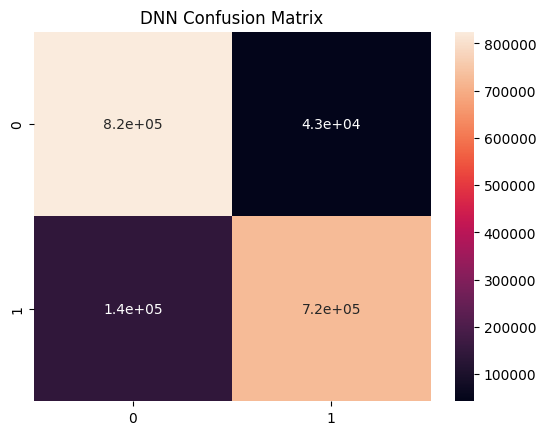

In [17]:
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test_1d, dnn_preds_1d), annot=True)
plt.title('DNN Confusion Matrix')
plt.show()

In [18]:
# Create instances of the models and train them
gru_model = GRUModel()

In [19]:
gru_history = train(gru_model, train_data_loader, val_data_loader, epochs=30, patience=3, learning_rate=0.001)

Epoch 1/30
21661/21661 [==============================] - 405s 18ms/step - loss: 0.2929 - accuracy: 0.8868 - val_loss: 0.2724 - val_accuracy: 0.8907
Epoch 2/30
21661/21661 [==============================] - 385s 17ms/step - loss: 0.2723 - accuracy: 0.8914 - val_loss: 0.2655 - val_accuracy: 0.8929
Epoch 3/30
21661/21661 [==============================] - 386s 17ms/step - loss: 0.2692 - accuracy: 0.8921 - val_loss: 0.2644 - val_accuracy: 0.8924
Epoch 4/30
21661/21661 [==============================] - 385s 17ms/step - loss: 0.2679 - accuracy: 0.8923 - val_loss: 0.2630 - val_accuracy: 0.8928
Epoch 5/30
21661/21661 [==============================] - 388s 17ms/step - loss: 0.2669 - accuracy: 0.8924 - val_loss: 0.2623 - val_accuracy: 0.8926
Epoch 6/30
21661/21661 [==============================] - 379s 17ms/step - loss: 0.2661 - accuracy: 0.8925 - val_loss: 0.2615 - val_accuracy: 0.8931
Epoch 7/30
21661/21661 [==============================] - 376s 17ms/step - loss: 0.2657 - accuracy: 0.8925

In [20]:
display(gru_model.summary())

Model: "gru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  multiple                 109824    
 l)                                                              
                                                                 
 batch_normalization_4 (Batc  multiple                 1024      
 hNormalization)                                                 
                                                                 
 spatial_dropout1d (SpatialD  multiple                 0         
 ropout1D)                                                       
                                                                 
 bidirectional_1 (Bidirectio  multiple                 123648    
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  multiple                 51

None

In [21]:
# Create instances of the models and train them
rnn_model = RNNModel()

In [22]:
rnn_history = train(rnn_model, train_data_loader, val_data_loader, epochs=30, patience=3, learning_rate=0.001)

Epoch 1/30
21661/21661 [==============================] - 313s 14ms/step - loss: 0.2938 - accuracy: 0.8866 - val_loss: 0.2714 - val_accuracy: 0.8903
Epoch 2/30
21661/21661 [==============================] - 309s 14ms/step - loss: 0.2734 - accuracy: 0.8905 - val_loss: 0.2661 - val_accuracy: 0.8915
Epoch 3/30
21661/21661 [==============================] - 308s 14ms/step - loss: 0.2703 - accuracy: 0.8914 - val_loss: 0.2631 - val_accuracy: 0.8929
Epoch 4/30
21661/21661 [==============================] - 307s 14ms/step - loss: 0.2683 - accuracy: 0.8919 - val_loss: 0.2643 - val_accuracy: 0.8932
Epoch 5/30
21661/21661 [==============================] - 305s 14ms/step - loss: 0.2671 - accuracy: 0.8922 - val_loss: 0.2642 - val_accuracy: 0.8929
Epoch 6/30
21661/21661 [==============================] - 307s 14ms/step - loss: 0.2662 - accuracy: 0.8924 - val_loss: 0.2628 - val_accuracy: 0.8930
Epoch 7/30
21661/21661 [==============================] - 310s 14ms/step - loss: 0.2652 - accuracy: 0.8926

In [23]:
display(rnn_model.summary())

Model: "rnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      multiple                  18176     
                                                                 
 batch_normalization_9 (Batc  multiple                 512       
 hNormalization)                                                 
                                                                 
 simple_rnn_1 (SimpleRNN)    multiple                  12352     
                                                                 
 batch_normalization_10 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 simple_rnn_2 (SimpleRNN)    multiple                  3104      
                                                                 
 batch_normalization_11 (Bat  multiple                 12

None

In [35]:
# Create instances of the models and train them
lstm_model = LSTMModel()

In [36]:
lstm_history = train(lstm_model, train_data_loader, val_data_loader, epochs=30, patience=3, learning_rate=0.001)

Epoch 1/30
21661/21661 [==============================] - 290s 13ms/step - loss: 0.2901 - accuracy: 0.8879 - val_loss: 0.2753 - val_accuracy: 0.8914
Epoch 2/30
21661/21661 [==============================] - 279s 12ms/step - loss: 0.2694 - accuracy: 0.8916 - val_loss: 0.2629 - val_accuracy: 0.8924
Epoch 3/30
21661/21661 [==============================] - 280s 12ms/step - loss: 0.2659 - accuracy: 0.8923 - val_loss: 0.2990 - val_accuracy: 0.8779
Epoch 4/30
21661/21661 [==============================] - 284s 13ms/step - loss: 0.2644 - accuracy: 0.8927 - val_loss: 0.2893 - val_accuracy: 0.8789
Epoch 5/30
21661/21661 [==============================] - 289s 13ms/step - loss: 0.2633 - accuracy: 0.8928 - val_loss: 0.2605 - val_accuracy: 0.8932
Epoch 6/30
21661/21661 [==============================] - 290s 13ms/step - loss: 0.2625 - accuracy: 0.8929 - val_loss: 0.2635 - val_accuracy: 0.8925
Epoch 7/30
21661/21661 [==============================] - 289s 13ms/step - loss: 0.2618 - accuracy: 0.8930

In [37]:
display(lstm_model.summary())

Model: "lstm_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               multiple                  72704     
                                                                 
 batch_normalization_19 (Bat  multiple                 512       
 chNormalization)                                                
                                                                 
 lstm_4 (LSTM)               multiple                  49408     
                                                                 
 batch_normalization_20 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 lstm_5 (LSTM)               multiple                  12416     
                                                                 
 batch_normalization_21 (Bat  multiple                

None

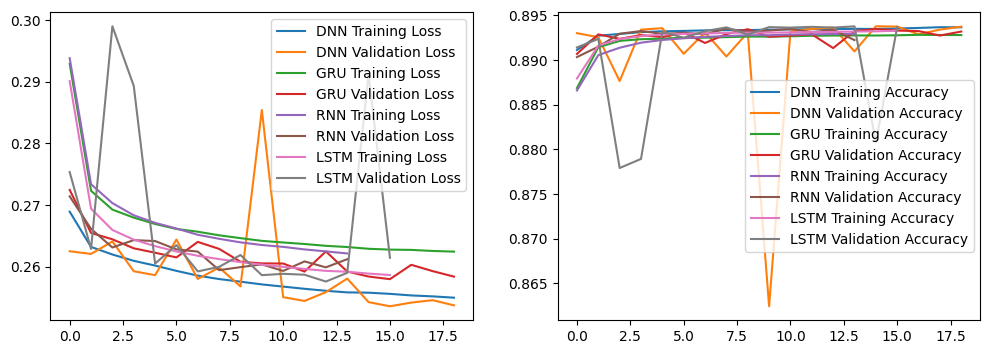

In [38]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['loss'], label='DNN Training Loss')
plt.plot(dnn_history.history['val_loss'], label='DNN Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dnn_history.history['accuracy'], label='DNN Training Accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='DNN Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.legend()
plt.show()

In [39]:
X_test.shape

(1732874, 1, 13)

In [40]:
# Compare performance using classification report and confusion matrix
gru_preds = gru_model.predict(X_test)

# Convert predictions and test labels to 1D arrays
gru_preds_1d = np.argmax(gru_preds, axis=-1).flatten()

print("GRU Classification Report:")
print(classification_report(y_test_1d, gru_preds_1d))

54153/54153 [==============================] - 293s 5ms/step
GRU Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    867466
           1       0.94      0.84      0.89    865408

    accuracy                           0.89   1732874
   macro avg       0.90      0.89      0.89   1732874
weighted avg       0.90      0.89      0.89   1732874



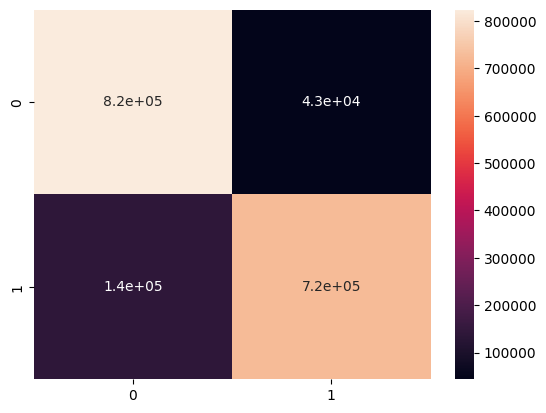

In [41]:
sns.heatmap(confusion_matrix(y_test_1d, gru_preds_1d), annot=True)
plt.show()

In [42]:
# Compare performance using classification report and confusion matrix
rnn_preds = rnn_model.predict(X_test)

# Convert predictions and test labels to 1D arrays
rnn_preds_1d = np.argmax(rnn_preds, axis=-1).flatten()

print("GRU Classification Report:")
print(classification_report(y_test_1d, rnn_preds_1d))

54153/54153 [==============================] - 180s 3ms/step
GRU Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    867466
           1       0.94      0.83      0.89    865408

    accuracy                           0.89   1732874
   macro avg       0.90      0.89      0.89   1732874
weighted avg       0.90      0.89      0.89   1732874



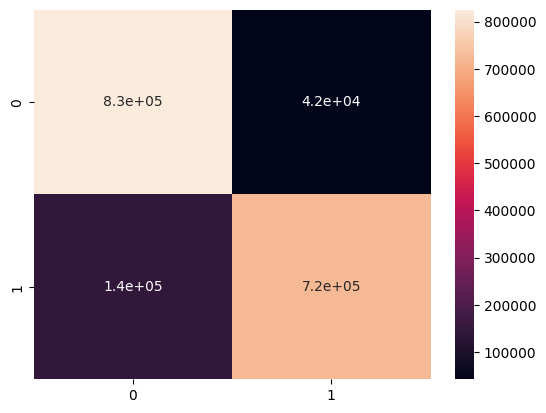

In [43]:
sns.heatmap(confusion_matrix(y_test_1d, rnn_preds_1d), annot=True)
plt.show()

In [44]:
# Compare performance using classification report and confusion matrix
lstm_preds = lstm_model.predict(X_test)

# Convert predictions and test labels to 1D arrays
lstm_preds_1d = np.argmax(lstm_preds, axis=-1).flatten()

print("GRU Classification Report:")
print(classification_report(y_test_1d, lstm_preds_1d))

54153/54153 [==============================] - 220s 4ms/step
GRU Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    867466
           1       0.94      0.84      0.89    865408

    accuracy                           0.89   1732874
   macro avg       0.90      0.89      0.89   1732874
weighted avg       0.90      0.89      0.89   1732874



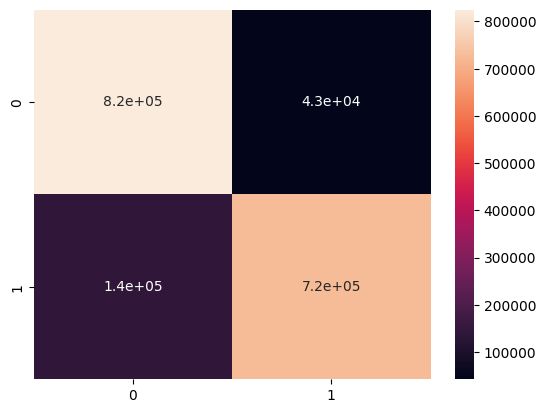

In [45]:
sns.heatmap(confusion_matrix(y_test_1d, lstm_preds_1d), annot=True)
plt.show()